# Data analysis & visualization

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [22]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [23]:
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path (comment out if on linux)
#filename = PureWindowsPath(filename)

### I. Worldwide

In [24]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [25]:
countries = ['Netherlands', 'Belgium', 'Germany']

In [26]:
df_world = pd.read_excel(filename, index_col="date", parse_dates=True)
df = df_world[df_world['location'].isin(countries)]
df.index = df.index.date
df.drop_duplicates('location', keep='last')

iso_code continent     location  total_cases  new_cases  \
2020-09-02      BEL    Europe      Belgium      85393.0        0.0   
2020-09-02      DEU    Europe      Germany     244855.0     1256.0   
2020-09-02      NLD    Europe  Netherlands      71057.0      461.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-09-02             282.857        9897.0         0.0                2.857   
2020-09-02            1203.714        9313.0        11.0                4.714   
2020-09-02             511.571        6221.0         6.0                3.286   

            total_cases_per_million  new_cases_per_million  \
2020-09-02                 7368.061                  0.000   
2020-09-02                 2922.457                 14.991   
2020-09-02                 4146.923                 26.904   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-09-02                          24.406                   853.954   
2020-09-02                          14.367                   111.155   
2020-09-02                          29.856                   363.061   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-09-02                   0.000                            0.247   
2020-09-02                   0.131                            0.056   
2020-09-02                   0.350                            0.192   

            new_tests  total_tests  total_tests_per_thousand  \
2020-09-02        NaN          NaN                       NaN   
2020-09-02        NaN          NaN                       NaN   
2020-09-02        NaN          NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-09-02                     NaN                 NaN   
2020-09-02                     NaN                 NaN   
2020-09-02                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-09-02                              NaN             NaN            NaN   
2020-09-02                              NaN             NaN            NaN   
2020-09-02                              NaN             NaN            NaN   

           tests_units  stringency_index  population  population_density  \
2020-09-02         NaN               NaN  11589616.0             375.564   
2020-09-02         NaN               NaN  83783945.0             237.016   
2020-09-02         NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-09-02        41.8         18.571         12.849       42658.576   
2020-09-02        46.6         21.453         15.957       45229.245   
2020-09-02        43.2         18.779         11.881       48472.545   

            extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
2020-09-02              0.2                114.898                 4.29   
2020-09-02              NaN                156.139                 8.31   
2020-09-02              NaN                109.361                 5.29   

            female_smokers  male_smokers  handwashing_facilities  \
2020-09-02            25.1          31.4                     NaN   
2020-09-02            28.2          33.1                     NaN   
2020-09-02            24.4          27.3                     NaN   

            hospital_beds_per_thousand  life_expectancy  
2020-09-02                        5.64            81.63  
2020-09-02                        8.00            81.33  
2020-09-02                        3.32            82.28

In [27]:
print(f"Total cases per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_cases_per_million'].agg('last').to_string()}")
print('\n')
print(f"Total deaths per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_deaths_per_million'].agg('last').to_string()}")

Total cases per million per country as for 2020-09-02:
location
Belgium        7368.061
Germany        2922.457
Netherlands    4146.923


Total deaths per million per country as for 2020-09-02:
location
Belgium        853.954
Germany        111.155
Netherlands    363.061


In [28]:
df['mortality_rate'] = df['new_deaths'] / df['new_cases']
df['mortality_rate_per_million'] = df['new_deaths_per_million'] / df['new_cases_per_million']

In [29]:
def dfplot(metric, title, xlabel, ylabel, logy=False):
    fig, ax = plt.subplots(figsize=(15, 5))
    df[df.index > begin_date.date()].groupby('location')[metric].plot(ax=ax, legend=True, fontsize=14, logy=logy)
    plt.legend(loc=2, prop={'size': 14})
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=14, fontweight="bold")
    plt.grid(axis='y')  
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    fig.autofmt_xdate()
    plt.show()

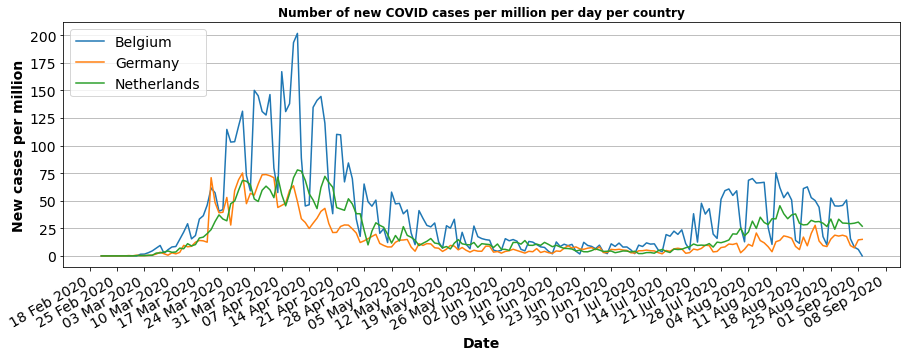

In [30]:
dfplot('new_cases_per_million', title="Number of new COVID cases per million per day per country", xlabel='Date', ylabel='New cases per million', logy=False)

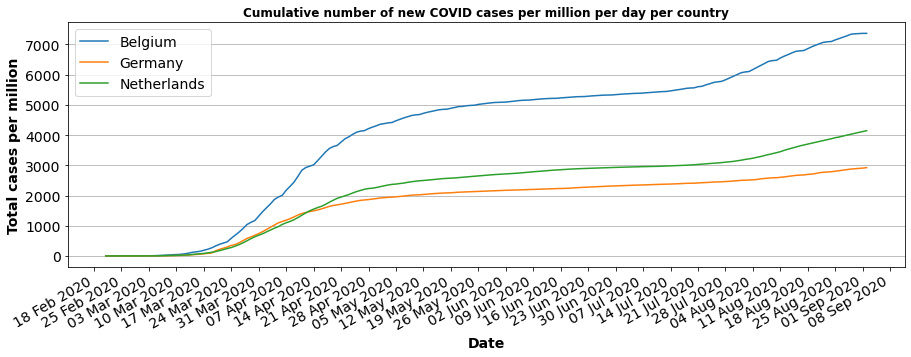

In [31]:
dfplot('total_cases_per_million', title="Cumulative number of new COVID cases per million per day per country", xlabel='Date', ylabel='Total cases per million')

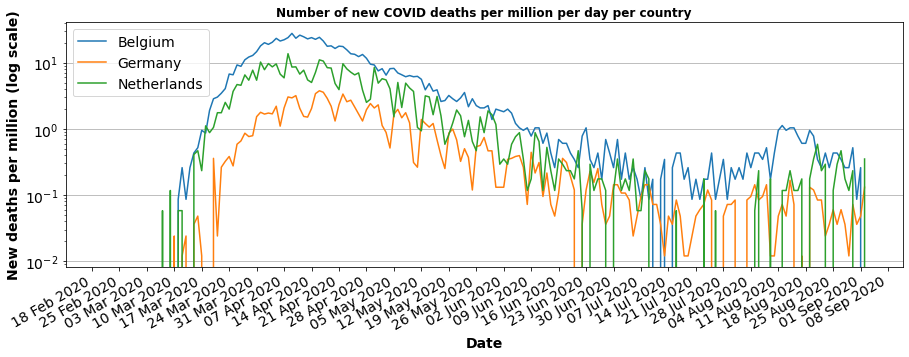

In [32]:
dfplot('new_deaths_per_million', title="Number of new COVID deaths per million per day per country", xlabel='Date', ylabel='New deaths per million (log scale)', logy=True)

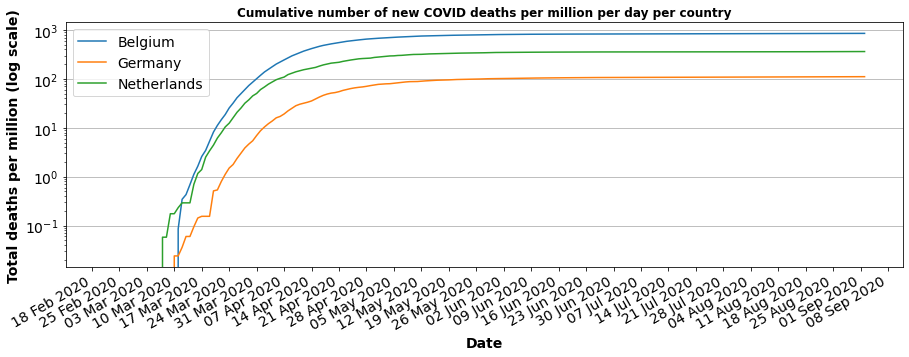

In [33]:
dfplot('total_deaths_per_million', title="Cumulative number of new COVID deaths per million per day per country", xlabel='Date', ylabel='Total deaths per million (log scale)', logy=True)

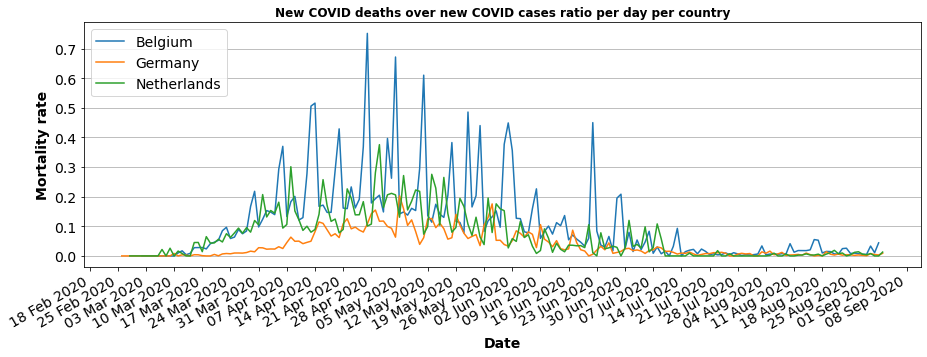

In [34]:
dfplot('mortality_rate', title="New COVID deaths over new COVID cases ratio per day per country", xlabel='Date', ylabel='Mortality rate')

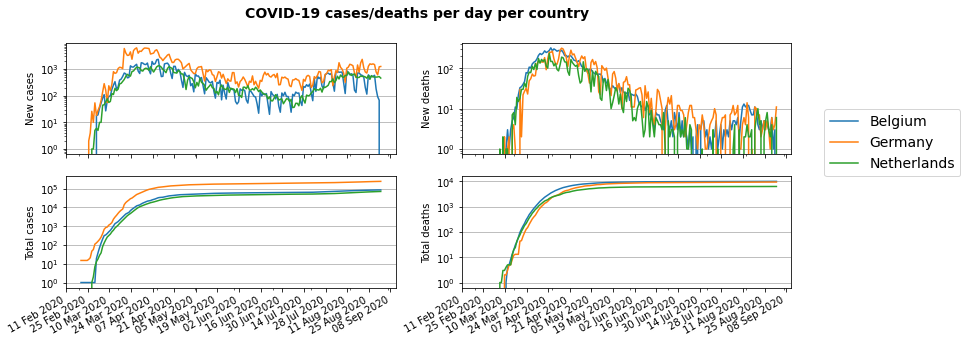

In [35]:
# combine altogether
fig, axs = plt.subplots(2, 2, sharex='col', sharey=False, figsize=(13,5))
(ax1, ax2), (ax3, ax4) = axs
df[df.index > begin_date.date()].groupby('location')['new_cases'].plot(ax=ax1, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['new_deaths'].plot(ax=ax2, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_cases'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y')
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths']
for ax, label in zip(axs.flat, labels):
    ax.set(ylabel=label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.1, 1.0), prop={'size': 14})
fig.suptitle('COVID-19 cases/deaths per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
plt.show()

In [36]:
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

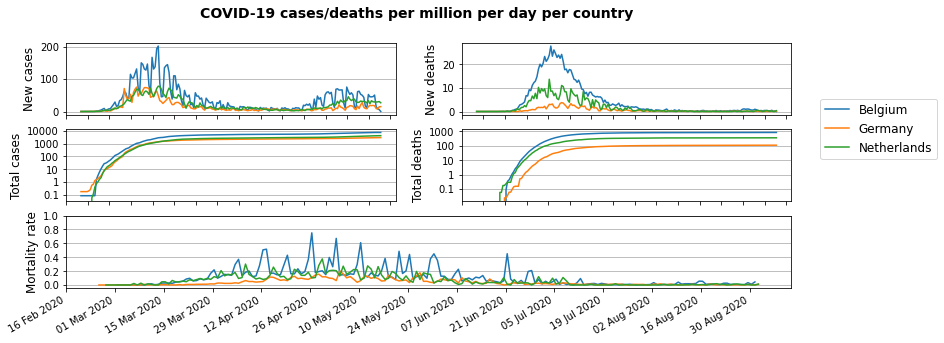

In [37]:
# combine altogether
fig = plt.figure(constrained_layout=True, figsize=(13, 5))
grid = fig.add_gridspec(nrows=3, ncols=2, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[2, :])
df[df.index > begin_date.date()].groupby('location')['new_cases_per_million'].plot(ax=ax1, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['new_deaths_per_million'].plot(ax=ax2, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['total_cases_per_million'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths_per_million'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['mortality_rate_per_million'].plot(ax=ax5, legend=False, fontsize=14, logy=False)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
# ax5.text(df.index.max()+timedelta(days=30), 0.5,
#          'Mortality rate =\n new deaths / cases', ha="center", va="center", size=12,
#         bbox=bbox_props)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y'); ax5.grid(axis='y')
axes = [ax1, ax2, ax3, ax4, ax5]
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths', 'Mortality rate']
for ax, label in zip(axes, labels):
    ax.set_ylabel(label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    if ax == ax1:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
    elif ax == ax2:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
    elif ax in [ax3, ax4]:
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
    else:
        ax.yaxis.set_ticks(np.arange(0,1.1,0.2))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.04, 1.78), prop={'size': 12})
fig.suptitle('COVID-19 cases/deaths per million per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
#plt.savefig("covid-19_cases_per_day_per_country.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

### II. NL

In [38]:
df_nl = df.query('iso_code == "NLD"')
df_nl.tail()

iso_code continent     location  total_cases  new_cases  \
2020-08-29      NLD    Europe  Netherlands      69063.0      507.0   
2020-08-30      NLD    Europe  Netherlands      69563.0      500.0   
2020-08-31      NLD    Europe  Netherlands      70071.0      508.0   
2020-09-01      NLD    Europe  Netherlands      70596.0      525.0   
2020-09-02      NLD    Europe  Netherlands      71057.0      461.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-08-29             505.286        6211.0         2.0                3.571   
2020-08-30             504.143        6215.0         4.0                3.429   
2020-08-31             511.571        6215.0         0.0                3.429   
2020-09-01             504.857        6215.0         0.0                3.143   
2020-09-02             511.571        6221.0         6.0                3.286   

            total_cases_per_million  new_cases_per_million  \
2020-08-29                 4030.552                 29.589   
2020-08-30                 4059.732                 29.180   
2020-08-31                 4089.380                 29.647   
2020-09-01                 4120.019                 30.639   
2020-09-02                 4146.923                 26.904   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-08-29                          29.489                   362.477   
2020-08-30                          29.422                   362.711   
2020-08-31                          29.856                   362.711   
2020-09-01                          29.464                   362.711   
2020-09-02                          29.856                   363.061   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-08-29                   0.117                            0.208   
2020-08-30                   0.233                            0.200   
2020-08-31                   0.000                            0.200   
2020-09-01                   0.000                            0.183   
2020-09-02                   0.350                            0.192   

            new_tests  total_tests  total_tests_per_thousand  \
2020-08-29        NaN          NaN                       NaN   
2020-08-30        NaN          NaN                       NaN   
2020-08-31        NaN          NaN                       NaN   
2020-09-01        NaN          NaN                       NaN   
2020-09-02        NaN          NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-08-29                     NaN                 NaN   
2020-08-30                     NaN                 NaN   
2020-08-31                     NaN                 NaN   
2020-09-01                     NaN                 NaN   
2020-09-02                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-08-29                              NaN             NaN            NaN   
2020-08-30                              NaN             NaN            NaN   
2020-08-31                              NaN             NaN            NaN   
2020-09-01                              NaN             NaN            NaN   
2020-09-02                              NaN             NaN            NaN   

           tests_units  stringency_index  population  population_density  \
2020-08-29         NaN             45.37  17134873.0             508.544   
2020-08-30         NaN             45.37  17134873.0             508.544   
2020-08-31         NaN             45.37  17134873.0             508.544   
2020-09-01         NaN               NaN  17134873.0             508.544   
2020-09-02         NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-08-29        43.2         18.779         11.881       48472.545   
2020-08-30        43.2         18.779         11.881       48472.5

In [39]:
start = pd.to_datetime('2020-08-25', format="%Y-%m-%d")
end = pd.to_datetime('today', format="%Y-%m-%d")
df_nl[start:end]

iso_code continent     location  total_cases  new_cases  \
2020-08-15      NLD    Europe  Netherlands      61785.0      636.0   
2020-08-16      NLD    Europe  Netherlands      62437.0      652.0   
2020-08-17      NLD    Europe  Netherlands      62943.0      506.0   
2020-08-18      NLD    Europe  Netherlands      63424.0      481.0   
2020-08-19      NLD    Europe  Netherlands      63911.0      487.0   
2020-08-20      NLD    Europe  Netherlands      64463.0      552.0   
2020-08-21      NLD    Europe  Netherlands      64992.0      529.0   
2020-08-22      NLD    Europe  Netherlands      65526.0      534.0   
2020-08-23      NLD    Europe  Netherlands      66034.0      508.0   
2020-08-24      NLD    Europe  Netherlands      66490.0      456.0   
2020-08-25      NLD    Europe  Netherlands      67062.0      572.0   
2020-08-26      NLD    Europe  Netherlands      67476.0      414.0   
2020-08-27      NLD    Europe  Netherlands      68046.0      570.0   
2020-08-28      NLD    Europe  Netherlands      68556.0      510.0   
2020-08-29      NLD    Europe  Netherlands      69063.0      507.0   
2020-08-30      NLD    Europe  Netherlands      69563.0      500.0   
2020-08-31      NLD    Europe  Netherlands      70071.0      508.0   
2020-09-01      NLD    Europe  Netherlands      70596.0      525.0   
2020-09-02      NLD    Europe  Netherlands      71057.0      461.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-08-15             612.000        6158.0         2.0                1.857   
2020-08-16             635.714        6160.0         2.0                1.714   
2020-08-17             625.571        6163.0         3.0                2.143   
2020-08-18             612.143        6163.0         0.0                2.143   
2020-08-19             570.429        6166.0         3.0                2.286   
2020-08-20             555.857        6172.0         6.0                2.857   
2020-08-21             549.000        6182.0        10.0                3.714   
2020-08-22             534.429        6186.0         4.0                4.000   
2020-08-23             513.857        6191.0         5.0                4.429   
2020-08-24             506.714        6191.0         0.0                4.000   
2020-08-25             519.714        6193.0         2.0                4.286   
2020-08-26             509.286        6198.0         5.0                4.571   
2020-08-27             511.857        6206.0         8.0                4.857   
2020-08-28             509.143        6209.0         3.0                3.857   
2020-08-29             505.286        6211.0         2.0                3.571   
2020-08-30             504.143        6215.0         4.0                3.429   
2020-08-31             511.571        6215.0         0.0                3.429   
2020-09-01             504.857        6215.0         0.0                3.143   
2020-09-02             511.571        6221.0         6.0                3.286   

            total_cases_per_million  new_cases_per_million  \
2020-08-15                 3605.804                 37.117   
2020-08-16                 3643.855                 38.051   
2020-08-17                 3673.386                 29.530   
2020-08-18                 3701.457                 28.071   
2020-08-19                 3729.879                 28.422   
2020-08-20                 3762.094                 32.215   
2020-08-21                 3792.967                 30.873   
2020-08-22                 3824.131                 31.165   
2020-08-23                 3853.778                 29.647   
2020-08-24                 3880.391                 26.612   
2020-08-25                 3913.773                 33.382   
2020-08-26                 3937.934                 24.161   
2020-08-27                 3971.200                 33.265   
2020-08-28                 4000.963                 29.764   
2020-08-29                 4030.552                 29.589 

In [40]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', parse_dates=True)
tmnl

Datum                                 Beschrijving
0 2020-02-27  Eerste besmetting met COVID-19             
1 2020-03-06  Eerste overlijden als gevolg van COVID-19  
2 2020-03-09  Regering komt met hygiene maatregelen      
3 2020-03-12  Thuisblijven bij klachten                  
4 2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5 2020-03-16  Alle scholen / kinderdagverblijven gesloten
6 2020-03-23  Start intelligente lockdown                
7 2020-05-11  Basisscholen, kappers, zwembaden open      
8 2020-06-01  Horeca mag weer open (op 1,5 m)            
9 2020-07-01  Evenementen, OV weer toegankelijk

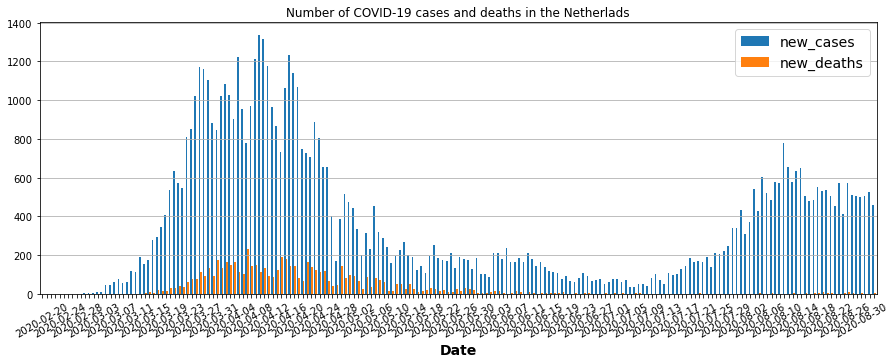

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

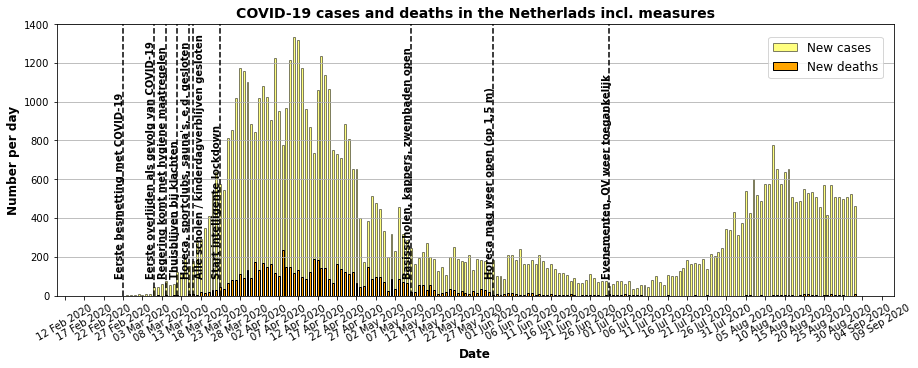

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.85, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
#plt.savefig("covid-19_nl_incl_maatregelen.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

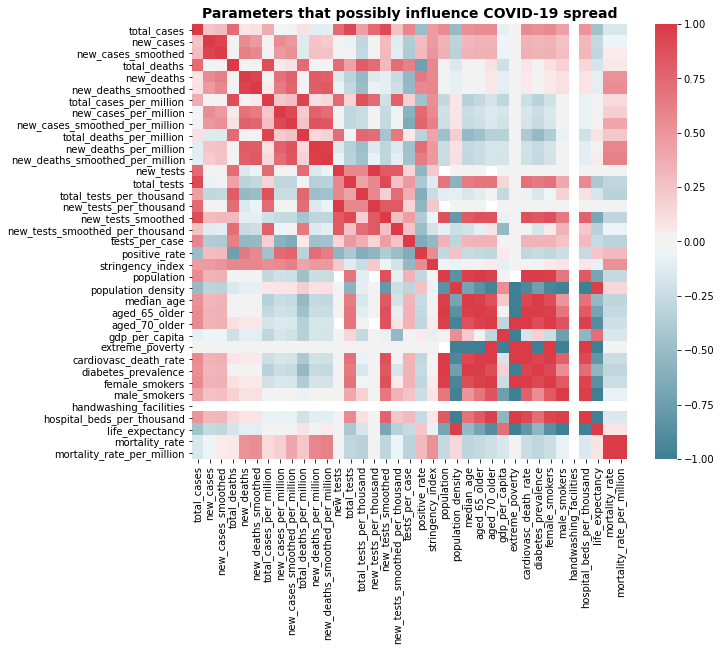

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
#plt.savefig("covid-19_parameters.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

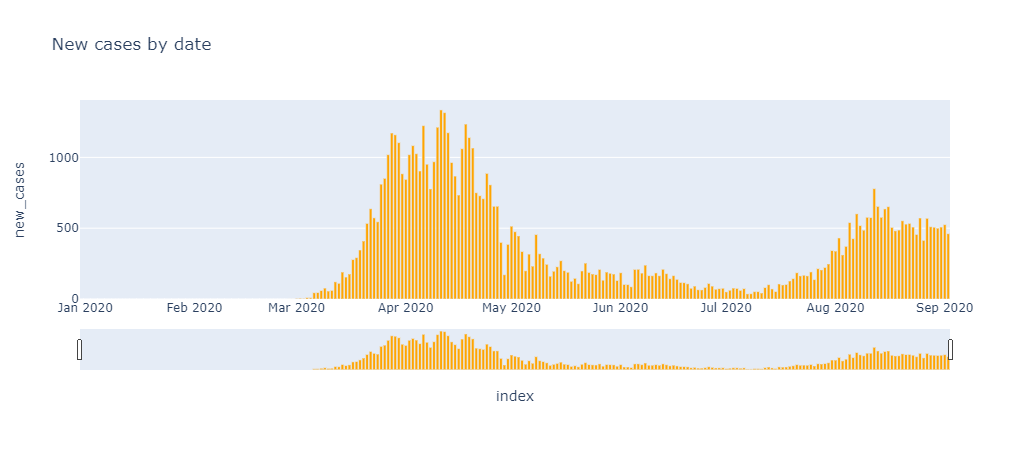

In [44]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [45]:
countries = df_world[(df_world.new_cases.notnull()) & (df_world.index > begin_date) & (df_world.continent == 'Europe')].reset_index()
countries['date'] = countries.date.dt.strftime('%Y-%m-%d')

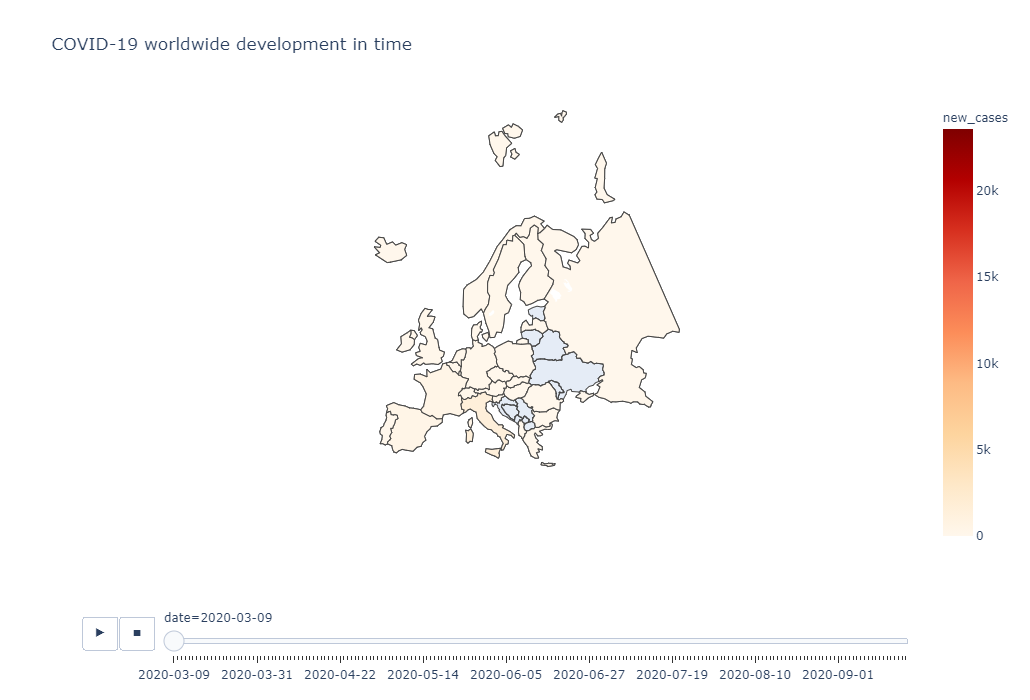

In [46]:
fig = px.choropleth(countries, locations="location",
                    locationmode="country names",
                    color="new_cases",
                    color_continuous_scale='OrRd', #px.colors.diverging.RdYlGn[::-1],
                    range_color=[0, np.max(countries.new_cases)],
                    animation_frame="date",
                    scope="europe",
                    title="COVID-19 worldwide development in time",
                    height=700)
fig.show()

# Predictive modelling

### I. Worldwide (regression)

In [47]:
df_w = df_world.drop_duplicates('location', keep='last')
df_w = df_w.reset_index()
df_w.drop('date', axis=1, inplace=True)
df_w = df_w.tail(-2) # remove World and International
df_w.head()

iso_code      continent              location  total_cases  new_cases  \
2  AGO      Africa         Angola                2654.0       30.0        
3  AIA      North America  Anguilla              3.0          0.0         
4  ALB      Europe         Albania               9606.0       93.0        
5  AND      Europe         Andorra               1184.0       8.0         
6  ARE      Asia           United Arab Emirates  70805.0      574.0       

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2  53.000              108.0         1.0         0.857                 
3  0.000               0.0           0.0         0.000                 
4  121.000             290.0         6.0         4.429                 
5  17.714              53.0          0.0         0.000                 
6  454.857             384.0         0.0         1.000                 

   total_cases_per_million  new_cases_per_million  \
2  80.751                   0.913                   
3  199.973                  0.000                   
4  3337.967                 32.316                  
5  15323.885                103.540                 
6  7158.962                 58.036                  

   new_cases_smoothed_per_million  total_deaths_per_million  \
2  1.613                           3.286                      
3  0.000                           0.000                      
4  42.046                          100.771                    
5  229.267                         685.951                    
6  45.990                          38.826                     

   new_deaths_per_million  new_deaths_smoothed_per_million  new_tests  \
2  0.030                   0.026                           NaN          
3  0.000                   0.000                           NaN          
4  2.085                   1.539                           NaN          
5  0.000                   0.000                           NaN          
6  0.000                   0.101                           NaN          

   total_tests  total_tests_per_thousand  new_tests_per_thousand  \
2 NaN          NaN                       NaN                       
3 NaN          NaN                       NaN                       
4 NaN          NaN                       NaN                       
5 NaN          NaN                       NaN                       
6 NaN          NaN                       NaN                       

   new_tests_smoothed  new_tests_smoothed_per_thousand  tests_per_case  \
2 NaN                 NaN                              NaN               
3 NaN                 NaN                              NaN               
4 NaN                 NaN                              NaN               
5 NaN                 NaN                              NaN               
6 NaN                 NaN                              NaN               

   positive_rate tests_units  stringency_index  population  \
2 NaN             NaN        NaN                32866268.0   
3 NaN             NaN        NaN                15002.0      
4 NaN             NaN        NaN                2877800.0    
5 NaN             NaN        NaN                77265.0      
6 NaN             NaN        NaN                9890400.0    

   population_density  median_age  aged_65_older  aged_70_older  \
2  23.890              16.8        2.405          1.362           
3 NaN                 NaN         NaN            NaN              
4  104.871             38.0        13.188         8.643           
5  163.755            NaN         NaN            NaN              
6  112.442             34.0        1.144          0.526           

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
2  5819.495       NaN               276.045                 
3 NaN             NaN              NaN                      
4  11803.431       1.1              304.195                 
5 NaN             NaN               109.135                 
6  67293.483      NaN               317.840   

In [48]:
df_w.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [49]:
df_w = df_w.drop(['iso_code', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 
               'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_tests', 
               'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
               'new_tests_smoothed_per_thousand', 'tests_units', 'stringency_index', 'tests_per_case', 
                  'positive_rate'], axis=1)
df_w.tail()

continent       location  total_cases  new_cases_smoothed  \
207  Africa    South Africa   628259.0     2177.429             
208  Africa    Zambia         12381.0      156.571              
209  Africa    Zimbabwe       6559.0       51.857               
210  NaN       World          25776601.0   264510.429           
211  NaN       International  696.0       NaN                   

     new_deaths_smoothed  new_cases_smoothed_per_million  \
207  136.429              36.713                           
208  1.143                8.517                            
209  5.286                3.489                            
210  5401.571             33.934                           
211 NaN                  NaN                               

     new_deaths_smoothed_per_million    population  population_density  \
207  2.300                            5.930869e+07  46.754               
208  0.062                            1.838396e+07  22.995               
209  0.356                            1.486293e+07  42.729               
210  0.693                            7.794799e+09  58.045               
211 NaN                              NaN           NaN                   

     median_age  aged_65_older  aged_70_older  gdp_per_capita  \
207  27.3        5.344          3.053          12294.876        
208  17.7        2.480          1.542          3689.251         
209  19.6        2.822          1.882          1899.775         
210  30.9        8.696          5.355          15469.207        
211 NaN         NaN            NaN            NaN               

     extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
207  18.9             200.380                5.52                  
208  57.5             234.499                3.94                  
209  21.4             307.846                1.82                  
210  10.0             233.070                8.51                  
211 NaN              NaN                    NaN                    

     female_smokers  male_smokers  handwashing_facilities  \
207  8.100           33.200        43.993                   
208  3.100           24.700        13.938                   
209  1.600           30.700        36.791                   
210  6.434           34.635        60.130                   
211 NaN             NaN           NaN                       

     hospital_beds_per_thousand  life_expectancy  
207  2.320                       64.13            
208  2.000                       63.89            
209  1.700                       61.49            
210  2.705                       72.58            
211 NaN                         NaN

In [50]:
print("% of nan values per column")
for column in df_w.columns:
    print(f"{column}: {df_w[column].isna().sum()} / {len(df_w)}")

% of nan values per column
continent: 2 / 210
location: 0 / 210
total_cases: 1 / 210
new_cases_smoothed: 2 / 210
new_deaths_smoothed: 2 / 210
new_cases_smoothed_per_million: 2 / 210
new_deaths_smoothed_per_million: 2 / 210
population: 1 / 210
population_density: 12 / 210
median_age: 25 / 210
aged_65_older: 28 / 210
aged_70_older: 26 / 210
gdp_per_capita: 28 / 210
extreme_poverty: 88 / 210
cardiovasc_death_rate: 25 / 210
diabetes_prevalence: 18 / 210
female_smokers: 69 / 210
male_smokers: 71 / 210
handwashing_facilities: 119 / 210
hospital_beds_per_thousand: 46 / 210
life_expectancy: 4 / 210


In [51]:
X = df_w.drop('total_cases', axis=1)
y = df_w['total_cases']
y.fillna(0, inplace=True)

In [52]:
y.isnull().values.any()

False

In [53]:
X.head()

continent              location  new_cases_smoothed  \
2  Africa         Angola                53.000               
3  North America  Anguilla              0.000                
4  Europe         Albania               121.000              
5  Europe         Andorra               17.714               
6  Asia           United Arab Emirates  454.857              

   new_deaths_smoothed  new_cases_smoothed_per_million  \
2  0.857                1.613                            
3  0.000                0.000                            
4  4.429                42.046                           
5  0.000                229.267                          
6  1.000                45.990                           

   new_deaths_smoothed_per_million  population  population_density  \
2  0.026                            32866268.0  23.890               
3  0.000                            15002.0    NaN                   
4  1.539                            2877800.0   104.871              
5  0.000                            77265.0     163.755              
6  0.101                            9890400.0   112.442              

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
2  16.8        2.405          1.362          5819.495       NaN                
3 NaN         NaN            NaN            NaN             NaN                
4  38.0        13.188         8.643          11803.431       1.1               
5 NaN         NaN            NaN            NaN             NaN                
6  34.0        1.144          0.526          67293.483      NaN                

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
2  276.045                3.94                NaN             NaN             
3 NaN                    NaN                  NaN             NaN             
4  304.195                10.08                7.1             51.2           
5  109.135                7.97                 29.0            37.8           
6  317.840                17.26                1.2             37.4           

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  
2  26.664                 NaN                          61.15            
3 NaN                     NaN                          81.88            
4 NaN                      2.89                        78.57            
5 NaN                     NaN                          83.73            
6 NaN                      1.20                        77.97

In [54]:
X.shape

(210, 20)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 2 to 211
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   continent                        208 non-null    object 
 1   location                         210 non-null    object 
 2   new_cases_smoothed               208 non-null    float64
 3   new_deaths_smoothed              208 non-null    float64
 4   new_cases_smoothed_per_million   208 non-null    float64
 5   new_deaths_smoothed_per_million  208 non-null    float64
 6   population                       209 non-null    float64
 7   population_density               198 non-null    float64
 8   median_age                       185 non-null    float64
 9   aged_65_older                    182 non-null    float64
 10  aged_70_older                    184 non-null    float64
 11  gdp_per_capita                   182 non-null    float64
 12  extreme_poverty       

### Pair correlations

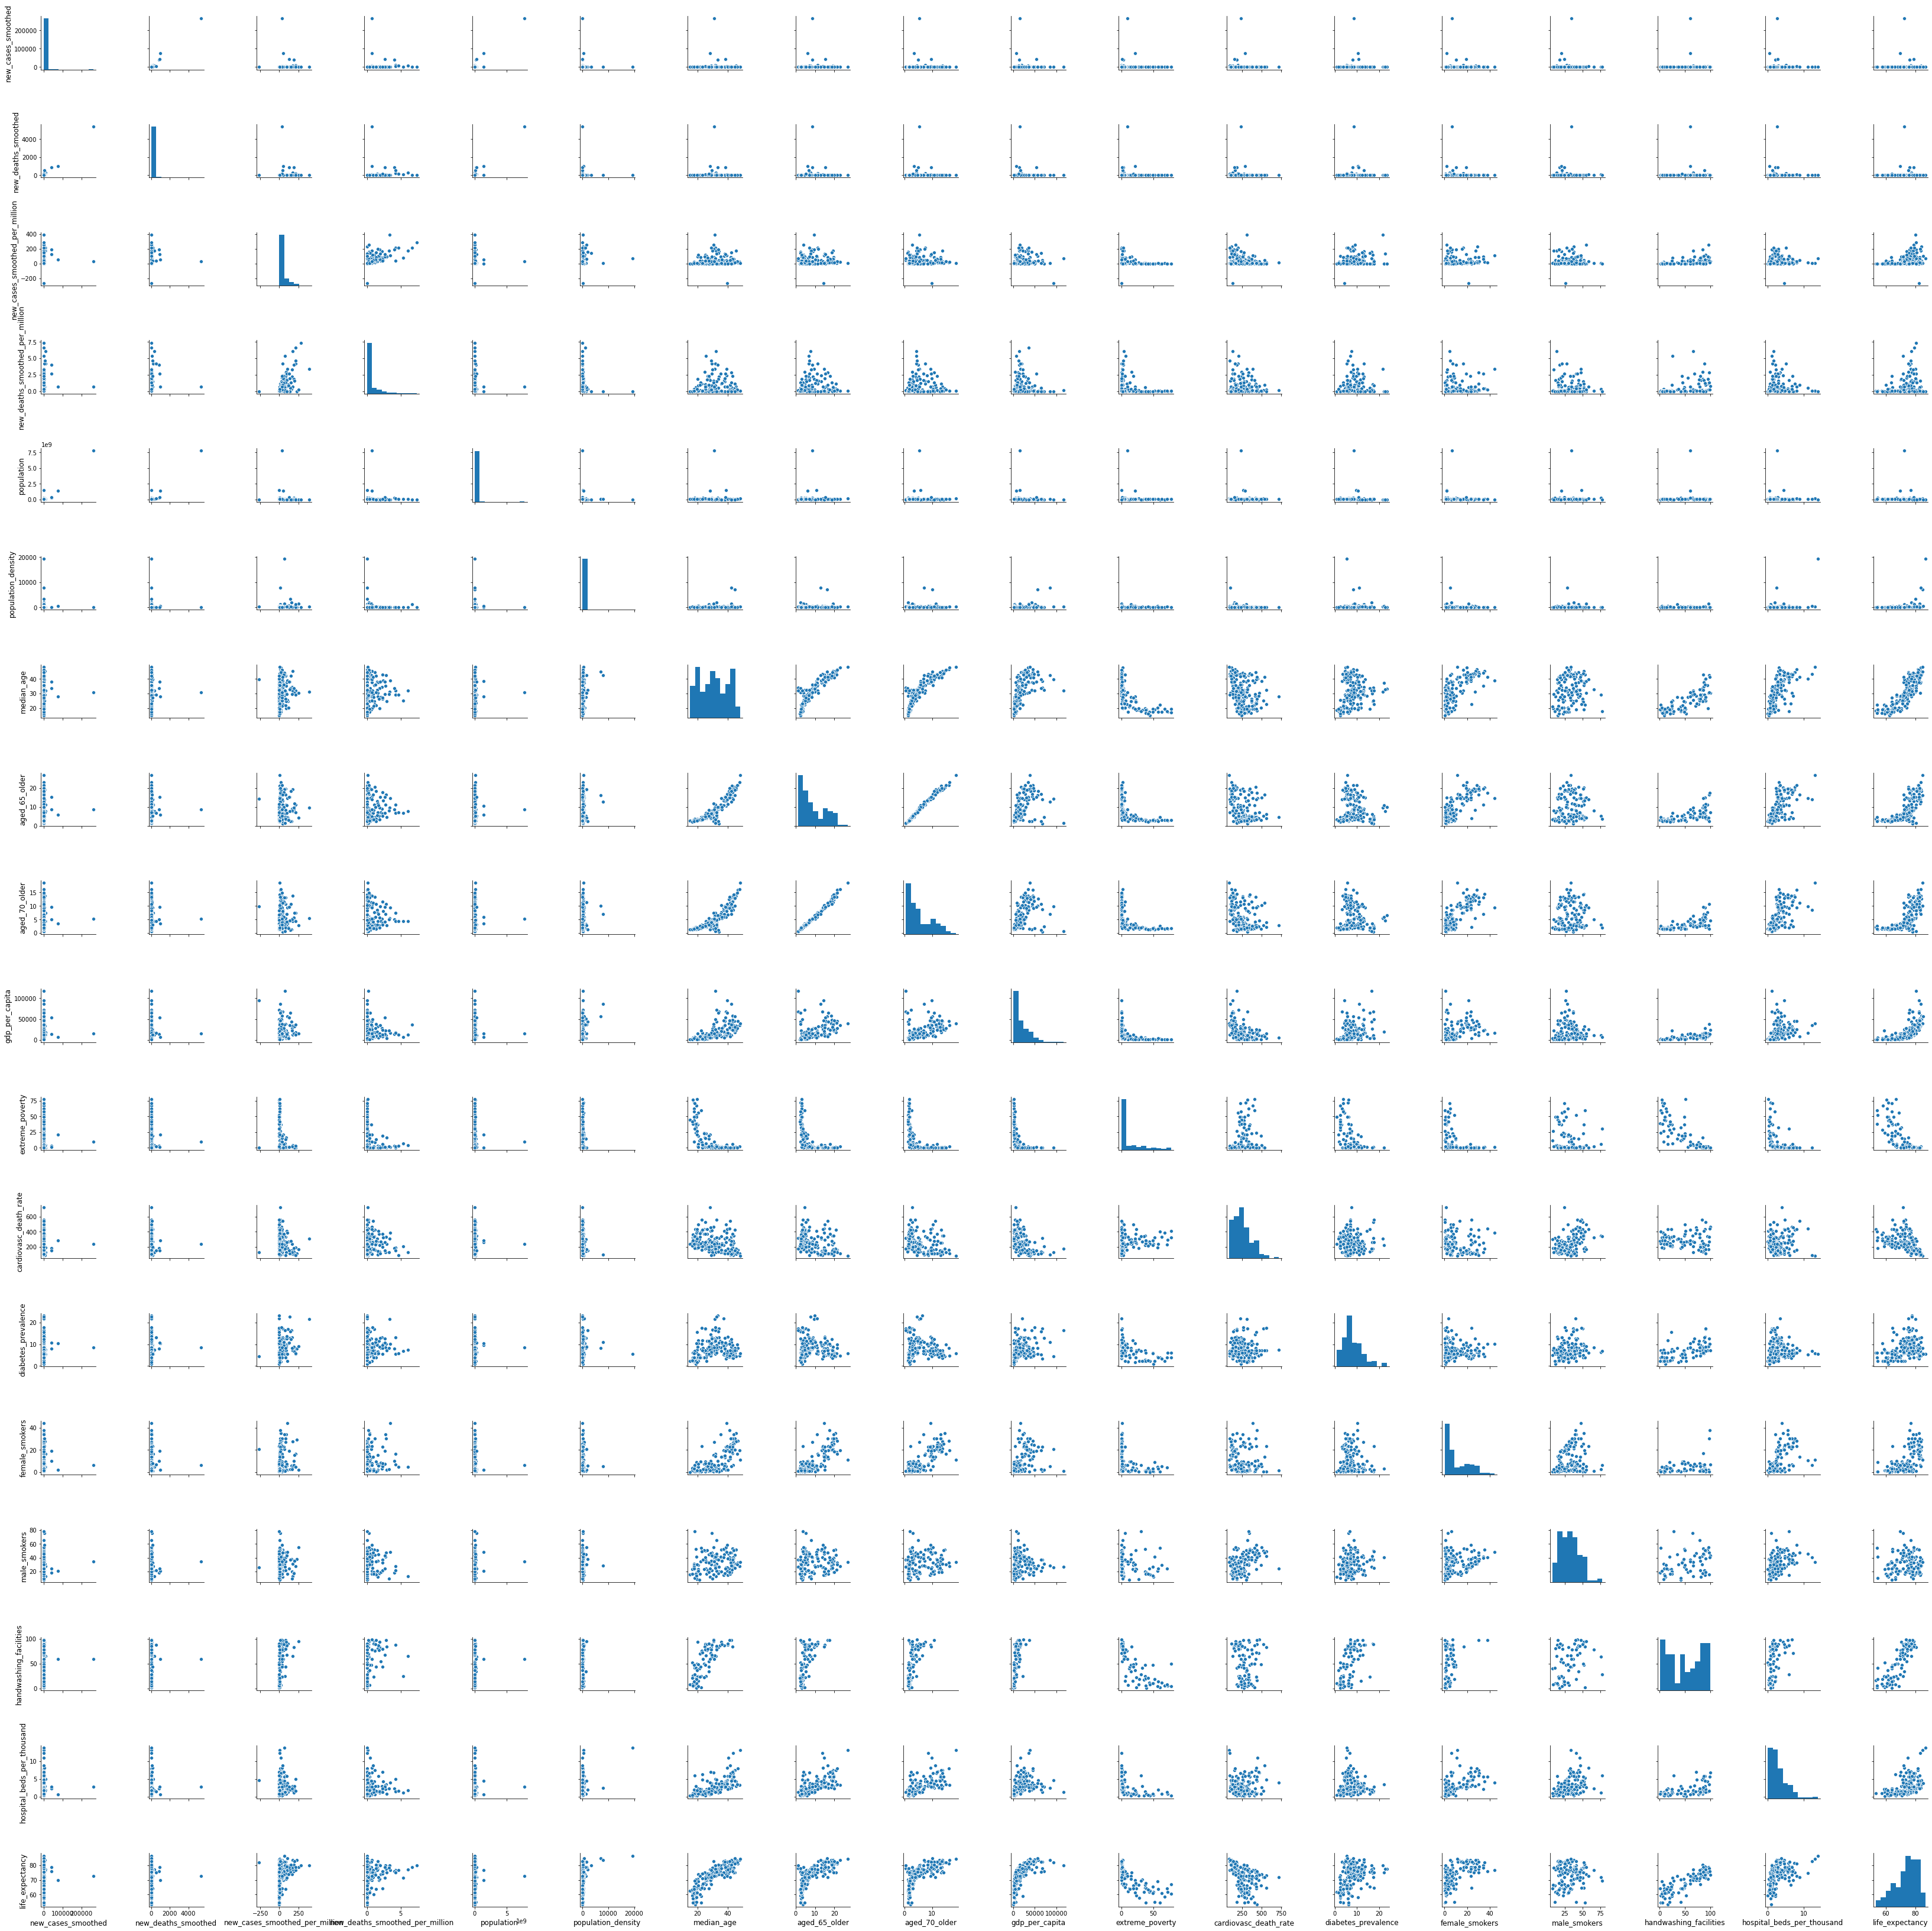

In [56]:
sns.pairplot(X)

In [57]:
# column normalization
# X_norm = X
# for col in X.columns[2:]:
#     X_norm[col] = stats.boxcox(X[col])[0]
# sns.pairplot(X_norm)

### Model comparison

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

categorical_features = X.columns[0:2].tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = X.columns[2:].tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

models = [DummyRegressor(), SGDRegressor(), ElasticNet()]

for model in models:
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    rgr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    rgr.fit(X_train, y_train)
    
    print(f"Best {model} score: {rgr.score(X_test, y_test):.3f}")

Best DummyRegressor() score: -0.001
Best SGDRegressor() score: 0.970
Best ElasticNet() score: 0.931


### Regressor score vs. test size

Best test size ratio is: 40.0%


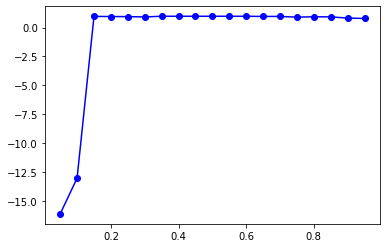

In [59]:
scores = []
sizes = np.linspace(0.05, 0.95, 19)
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    regressor = SGDRegressor()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', regressor)]).fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))
 
plt.plot(sizes, scores, '-bo')
print(f"Best test size ratio is: {sizes[np.argmax(scores)]*100}%")

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
parameters = {
             'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
             'regressor__penalty': ['l2', 'l1', 'elasticnet'],
             'regressor__alpha': [0.0001, 0.001, 0.01],
             'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
             }
regressor = SGDRegressor()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor',  regressor)])
gsrgr = GridSearchCV(pipe, parameters).fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % gsrgr.best_score_)
print(gsrgr.best_params_)
print('R2: ', r2_score(y_pred = gsrgr.predict(X_test), y_true = y_test))

Best parameter (CV score=-0.769):
{'regressor__alpha': 0.0001, 'regressor__learning_rate': 'optimal', 'regressor__loss': 'huber', 'regressor__penalty': 'elasticnet'}
R2:  0.00579769237123251


In [61]:
regressor = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SGDRegressor())]).fit(X_train, y_train)
print(f"Model score: {regressor.score(X_test, y_test):.3f}")
print('R2: ', r2_score(y_pred = regressor.predict(X_test), y_true = y_test))

Model score: 0.795
R2:  0.7948944141278741


In [62]:
# Hyperparameter optimization across multiple models in scikit-learn
# http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=2, n_jobs=2, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train = preprocessor.fit_transform(X_train)

models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, scoring='accuracy')

helper.score_summary(sort_by='max_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Running GridSearchCV for SVC.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    4.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.0s finished


estimator min_score  mean_score max_score   std_score  \
2   RandomForestClassifier      0.015873  0.015873    0.015873  0            
3   RandomForestClassifier      0.015873  0.015873    0.015873  0            
5   AdaBoostClassifier          0         0.00793651  0.015873  0.00793651   
6   GradientBoostingClassifier  0.015873  0.015873    0.015873  0            
7   GradientBoostingClassifier  0.015873  0.015873    0.015873  0            
8   GradientBoostingClassifier  0.015873  0.015873    0.015873  0            
9   GradientBoostingClassifier  0.015873  0.015873    0.015873  0            
0   ExtraTreesClassifier        0         0           0         0            
1   ExtraTreesClassifier        0         0           0         0            
4   AdaBoostClassifier          0         0           0         0            
10  SVC                         0         0           0         0            
11  SVC                         0         0           0         0            
12  SVC                         0         0           0         0            
13  SVC                         0         0           0         0            
14  SVC                         0         0           0         0            
15  SVC                         0         0           0         0            

   n_estimators learning_rate    C  kernel   gamma  
2   16           NaN           NaN  NaN     NaN     
3   32           NaN           NaN  NaN     NaN     
5   32           NaN           NaN  NaN     NaN     
6   16           0.8           NaN  NaN     NaN     
7   32           0.8           NaN  NaN     NaN     
8   16           1             NaN  NaN     NaN     
9   32           1             NaN  NaN     NaN     
0   16           NaN           NaN  NaN     NaN     
1   32           NaN           NaN  NaN     NaN     
4   16           NaN           NaN  NaN     NaN     
10  NaN          NaN           1    linear  NaN     
11  NaN          NaN           10   linear  NaN     
12  NaN          NaN           1    rbf     0.001   
13  NaN          NaN           1    rbf     0.0001  
14  NaN          NaN           10   rbf     0.001   
15  NaN          NaN           10   rbf     0.0001

### II. NL (forecasting with sktime)

In [64]:
df_nl.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  247.000000    247.000000   241.000000          247.000000     
mean   29849.939271  287.680162   288.649664          3410.457490    
std    24442.551668  335.763574   327.539257          2790.473972    
min    0.000000      0.000000     0.000000            0.000000       
25%    10.000000     5.000000     11.571000           0.000000       
50%    39791.000000  164.000000   170.571000          4893.000000    
75%    50373.500000  486.500000   504.143000          6116.500000    
max    71057.000000  1335.000000  1119.857000         6221.000000    

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  247.000000  241.000000           247.000000                
mean   25.186235   25.780668            1742.057818               
std    46.613766   44.362822            1426.479885               
min    0.000000    0.000000             0.000000                  
25%    0.000000    0.000000             0.584000                  
50%    2.000000    2.857000             2322.223000               
75%    22.000000   22.714000            2939.823000               
max    234.000000  153.571000           4146.923000               

       new_cases_per_million  new_cases_smoothed_per_million  \
count  247.000000             241.000000                       
mean   16.789138              16.845743                        
std    19.595313              19.115356                        
min    0.000000               0.000000                         
25%    0.292000               0.675000                         
50%    9.571000               9.955000                         
75%    28.392500              29.422000                        
max    77.911000              65.355000                        

       total_deaths_per_million  new_deaths_per_million  \
count  247.000000                247.000000               
mean   199.036061                1.469858                 
std    162.853510                2.720373                 
min    0.000000                  0.000000                 
25%    0.000000                  0.000000                 
50%    285.558000                0.117000                 
75%    356.962500                1.284000                 
max    363.061000                13.656000                

       new_deaths_smoothed_per_million  new_tests   total_tests  \
count  241.000000                       0.0        2.400000e+01   
mean   1.504539                        NaN         5.271434e+05   
std    2.589056                        NaN         4.298539e+05   
min    0.000000                        NaN         1.708000e+04   
25%    0.000000                        NaN         2.001192e+05   
50%    0.167000                        NaN         3.925500e+05   
75%    1.326000                        NaN         7.864248e+05   
max    8.963000                        NaN         1.464715e+06   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
count  24.000000                 0.0                     155.000000           
mean   30.764292                NaN                      8891.954839          
std    25.086577                NaN                      4967.766141          
min    0.997000                 NaN                      3048.000000          
25%    11.678750                NaN                      4520.500000          
50%    22.909500                NaN                      8422.000000          
75%    45.896000                NaN                      12052.500000         
max    85.482000                NaN                      20079.000000         

       new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
count  155.000000                       155.000000      155.000000      
mean   0.518923                         52.030852       0.071200        
std    0.289944                         54.134839       0.078391        
min    0.178000                         3.712000        

In [65]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 247
continent: 0 / 247
location: 0 / 247
total_cases: 0 / 247
new_cases: 0 / 247
new_cases_smoothed: 6 / 247
total_deaths: 0 / 247
new_deaths: 0 / 247
new_deaths_smoothed: 6 / 247
total_cases_per_million: 0 / 247
new_cases_per_million: 0 / 247
new_cases_smoothed_per_million: 6 / 247
total_deaths_per_million: 0 / 247
new_deaths_per_million: 0 / 247
new_deaths_smoothed_per_million: 6 / 247
new_tests: 247 / 247
total_tests: 223 / 247
total_tests_per_thousand: 223 / 247
new_tests_per_thousand: 247 / 247
new_tests_smoothed: 92 / 247
new_tests_smoothed_per_thousand: 92 / 247
tests_per_case: 92 / 247
positive_rate: 92 / 247
tests_units: 85 / 247
stringency_index: 3 / 247
population: 0 / 247
population_density: 0 / 247
median_age: 0 / 247
aged_65_older: 0 / 247
aged_70_older: 0 / 247
gdp_per_capita: 0 / 247
extreme_poverty: 247 / 247
cardiovasc_death_rate: 0 / 247
diabetes_prevalence: 0 / 247
female_smokers: 0 / 247
male_smokers: 0 / 247
handwashing_fac

In [66]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [67]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

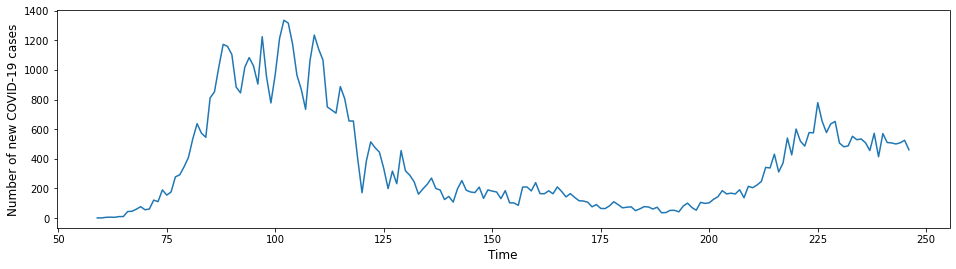

In [68]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

168 20


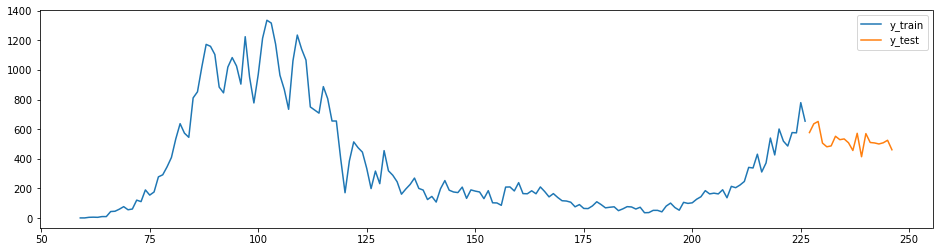

In [69]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [70]:
fh = np.arange(len(y_test)) + 1

0.2830737557477884

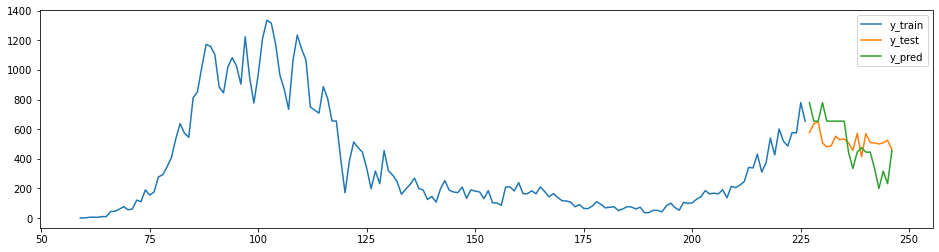

In [71]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.9503890256987898

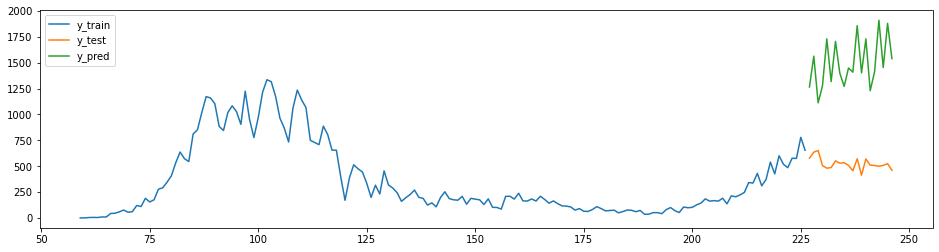

In [72]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.22518425042155504

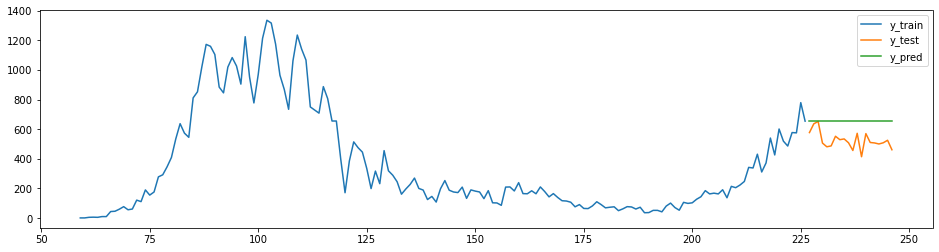

In [73]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.5579647459997752

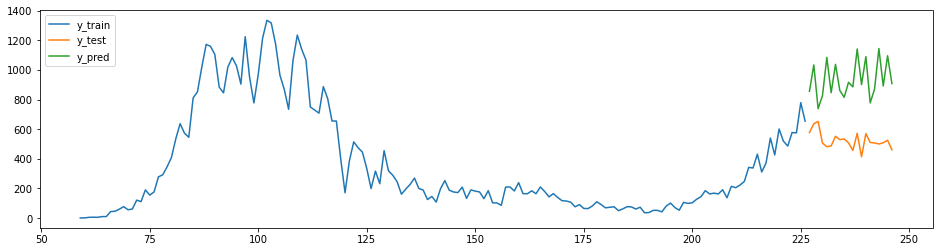

In [74]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [75]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.42323492627764275

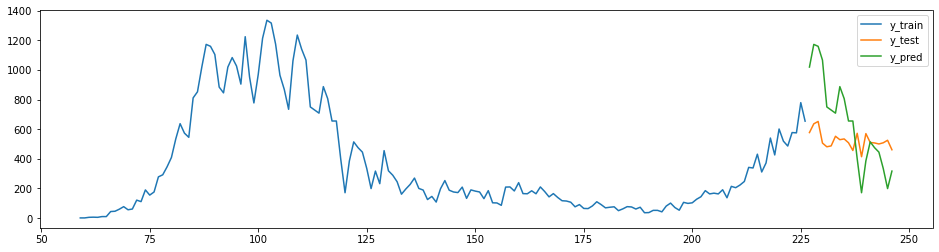

In [76]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [77]:
gscv.best_params_

{'window_length': 5}

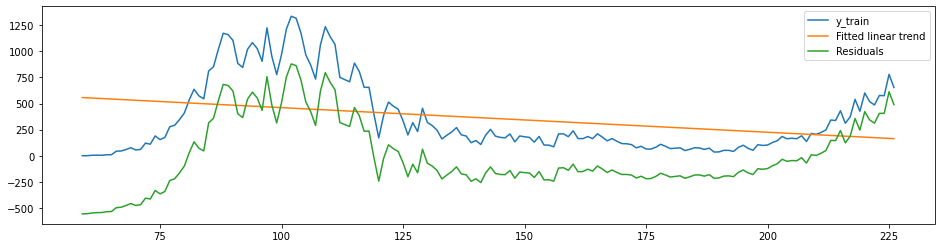

In [78]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.3321591506291749

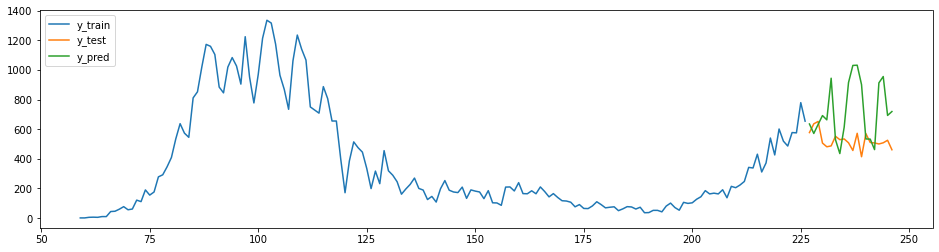

In [79]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [80]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.103503364623035

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2718635ea88>)

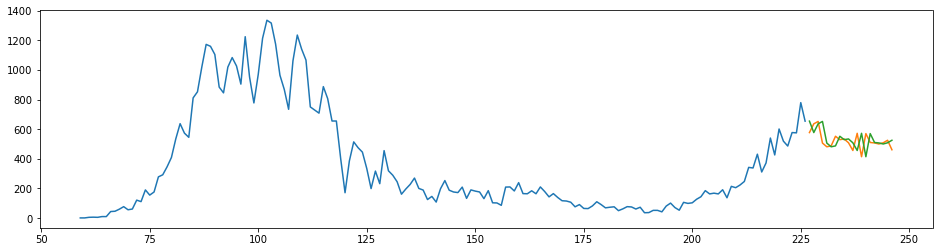

In [81]:
plot_ys(y_train, y_test, y_pred)

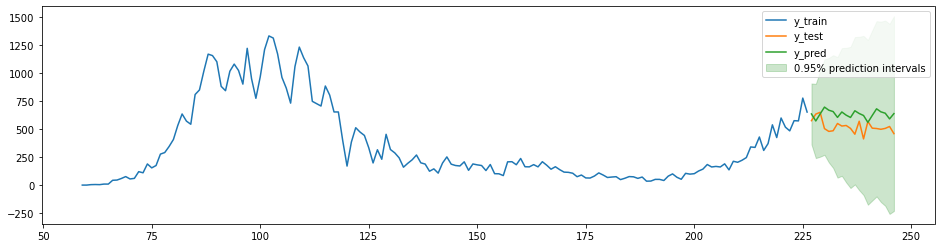

In [82]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();